# Title: EDA

**Comment:** In this part, I will look at the distribution of quantities of different substances in patients belonging to the three groups 0, 1 and 2 to identify which substances differ the most. I will run the independence t-test for each substance in groups 0-2, 0-1 and 1-2 and examine those with the p-value < 0.05. The t-test in run on samples without outliers that I remove by using the z-score method. The aim of this analysis is to get an overview of features that may have a bigger influence on the classification than others.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data

In [2]:
import pandas as pd

data = pd.read_csv("data.csv")
print('Data shape', data.shape)
data_ohe = pd.read_csv("data_ohe.csv") # One-hot encoded
print('Data one-hot encoded shape', data_ohe.shape)
data_ohe.head()

Data shape (368, 145)
Data one-hot encoded shape (368, 152)


,sample_id,group,age,Alanine,Creatine,Creatinine,Glutamine,Glycine,Histidine,Isoleucine,...,severity_0,severity_1,severity_2,severity_3,sex_0,sex_1,age_cat_0,age_cat_1,age_cat_2,age_cat_3
0,6,2,72,0.411,0.016,0.088,0.705,0.274,0.063,0.077,...,1,0,0,0,0,1,0,0,1,0
1,7,2,89,0.379,0.018,0.069,0.696,0.538,0.034,0.062,...,1,0,0,0,1,0,0,0,0,1
2,9,2,82,0.362,0.058,0.117,0.657,0.311,0.054,0.054,...,1,0,0,0,1,0,0,0,1,0
3,19,2,56,0.394,0.007,0.100,0.783,0.227,0.067,0.084,...,1,0,0,0,0,1,0,1,0,0
4,20,2,87,0.224,0.122,0.155,0.452,0.220,0.055,0.033,...,1,0,0,0,0,1,0,0,0,1


# Prepare data 

In [3]:
# Prepare data for modeling
data_mod=data_ohe.drop(['age', 'sample_id'], axis=1)

# Choose only the data with patients in groups 0 and 2
data_gr02=data_mod[(data_mod['group']==0)|(data_mod['group']==2)]
print('Shape of onehot encoded data with only extreme groups 0 and 2:', data_gr02.shape)

# Choose only the data with patients in groups 0 and 1
data_gr01=data_mod[(data_mod['group']==0)|(data_mod['group']==1)]
print('Shape of onehot encoded data with groups 0 and 1:', data_gr01.shape)

# Choose only the data with patients in groups 1 and 2
data_gr12=data_mod[(data_mod['group']==1)|(data_mod['group']==2)]
print('Shape of onehot encoded data with only extreme groups 1 and 2:', data_gr12.shape)

Shape of onehot encoded data with only extreme groups 0 and 2: (340, 150)
Shape of onehot encoded data with groups 0 and 1: (122, 150)
Shape of onehot encoded data with only extreme groups 1 and 2: (274, 150)


# z-scores and t-test

**Comment:** In order run the independent t-test, I will remove the outliers.

In [4]:
# Create subset with only numerical features
%store -r col_float64
data_num=data_mod[col_float64]

# Identify outliers based on the 3*std away
zscores_data_num = (data_num - data_num.mean()) / (data_num.std())
zfilter_data_num = np.abs(zscores_data_num) > 3

print("Number of outliers detected per feature using z-scores:")
print(zfilter_data_num.sum(axis=0))
print("Total number of outliers detected:", zfilter_data_num.sum(axis=0).sum())

Number of outliers detected per feature using z-scores:
Alanine        6
Creatine       6
Creatinine     7
Glutamine      4
Glycine       10
              ..
ApoA1_HDL4     3
ApoA2_HDL1     6
ApoA2_HDL2     5
ApoA2_HDL3     6
ApoA2_HDL4     0
Length: 139, dtype: int64
Total number of outliers detected: 520


In [5]:
# Remove the outliers 
data_num_wo=data_num[~zfilter_data_num]

# Show number of NaN in the entire DataFrame
print(data_num_wo.isnull().sum().sum())

data_num_wo.head()

520


,Alanine,Creatine,Creatinine,Glutamine,Glycine,Histidine,Isoleucine,Leucine,Methionine,Ornithine,...,Phospholipids_HDL3,Phospholipids_HDL4,ApoA1_HDL1,ApoA1_HDL2,ApoA1_HDL3,ApoA1_HDL4,ApoA2_HDL1,ApoA2_HDL2,ApoA2_HDL3,ApoA2_HDL4
0,0.411,0.016,0.088,0.705,0.274,0.063,0.077,0.119,0.022,0.041,...,10.74,23.66,11.70,12.89,19.43,65.81,1.02,1.57,3.40,15.17
1,0.379,0.018,0.069,0.696,NaN,0.034,0.062,0.082,0.000,0.035,...,13.72,27.79,14.14,14.83,23.45,77.41,1.57,2.77,5.49,18.97
2,0.362,0.058,0.117,0.657,0.311,0.054,0.054,0.097,0.009,0.048,...,14.81,25.25,25.53,17.31,24.52,71.67,2.75,3.58,5.84,17.22
3,0.394,0.007,0.100,0.783,0.227,0.067,0.084,0.087,0.008,0.000,...,10.61,23.90,10.68,11.57,15.62,65.09,1.16,2.20,4.29,17.87
4,0.224,0.122,0.155,0.452,0.220,0.055,0.033,0.086,0.005,0.000,...,14.48,17.27,15.86,15.26,22.83,44.42,2.40,3.93,6.29,9.79


## The extreme groups 0 (post-COVID) and 2 (acute phase of infection)

**Null hypothesis:** \
H0 = the distribution of values of each metabolite in the two extreme groups of patients is roughly the same.
If the p_value will be less than 0.05, I can reject this null hypothesis and conclude that the distribution of values of each metabolite is different in the two groups. 

In [6]:
from scipy.stats import ttest_ind

# I have to now add the'group'column because I want to distinguish between the two groups to run the t-test
group=data["group"]
data_num_wo.insert(0,'group', group)

p_values=[]
for col in list(data_num_wo.columns)[1:]:
    val0=data_num_wo[data_num_wo['group']==0][col]
    val2=data_num_wo[data_num_wo['group']==2][col]
    t_statistic, p_value = ttest_ind(val0, val2, nan_policy="omit", equal_var=False)
    p_values.append(p_value)
    
# Collect the p_values in a DataFrame
p_values_df_gr02=pd.DataFrame(list(data_num_wo.columns[1:]), columns=["metabolite"]) # ignore the first column ['group'] as not needed anymore
p_values_df_gr02["p_values"]=p_values

# Choose only entries where p<0.05 where we reject the null hypothesis
p_values_df_gr02=p_values_df_gr02[p_values_df_gr02["p_values"]<0.05]
print(p_values_df_gr02.shape)

(95, 2)


**Comment:** It seems that the quantity of 95 out of the 139 metabolites (all the numerical features) differ in patients in the two extreme groups 0 and 2.

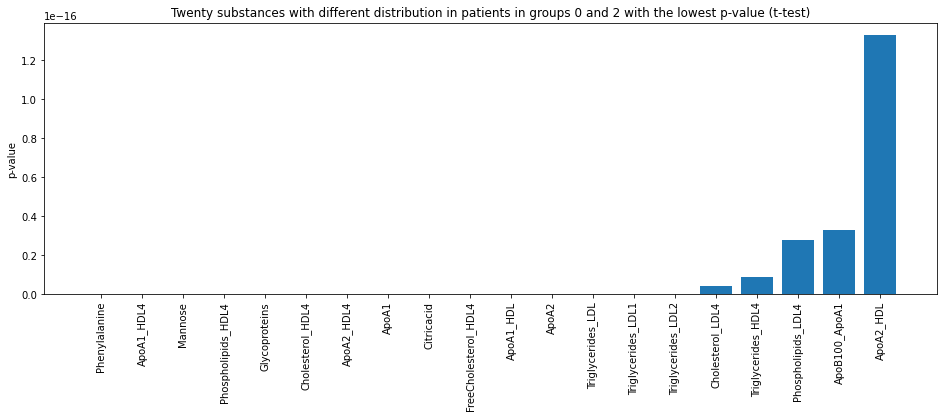

In [7]:
# Store the data with sorted p-values
p_values_df_sorted_gr02=p_values_df_gr02.sort_values(by="p_values")

# Plot the features with the lowest p_value
plt.figure(figsize=(16,5))
plt.bar(p_values_df_sorted_gr02[:20]["metabolite"], p_values_df_sorted_gr02[:20]["p_values"])
plt.ylabel("p-value")
plt.title("Twenty substances with different distribution in patients in groups 0 and 2 with the lowest p-value (t-test)")
plt.xticks(rotation=90)
plt.show()

**Comment:** The substances that differ the most between the two groups 0 and 2 are: the amino acid: Phenylalanine, the sugar Mannose, Glycoproteins, Citricacid (related to the Krebs cycle: a key metabolic pathway that connects carbohydrate, fat, and protein metabolism) as well as Phospholipids (HDL4, LDL4 and HDL), Cholesterol (HDL4, LDL4), FreeCholesterol (HDL4, HDL3), Triglycerides (LDL, LDL1, LDL2, LDL6, HDL4) as well as Apolipoproteins (that have a role in lipid metabolism): ApoA1, ApoA1_HDL, ApoA1_HDL3, ApoA1_HDL4, ApoA2, ApoA2_HDL, ApoA2_HDL4 and ApoB100_ApoA1. 

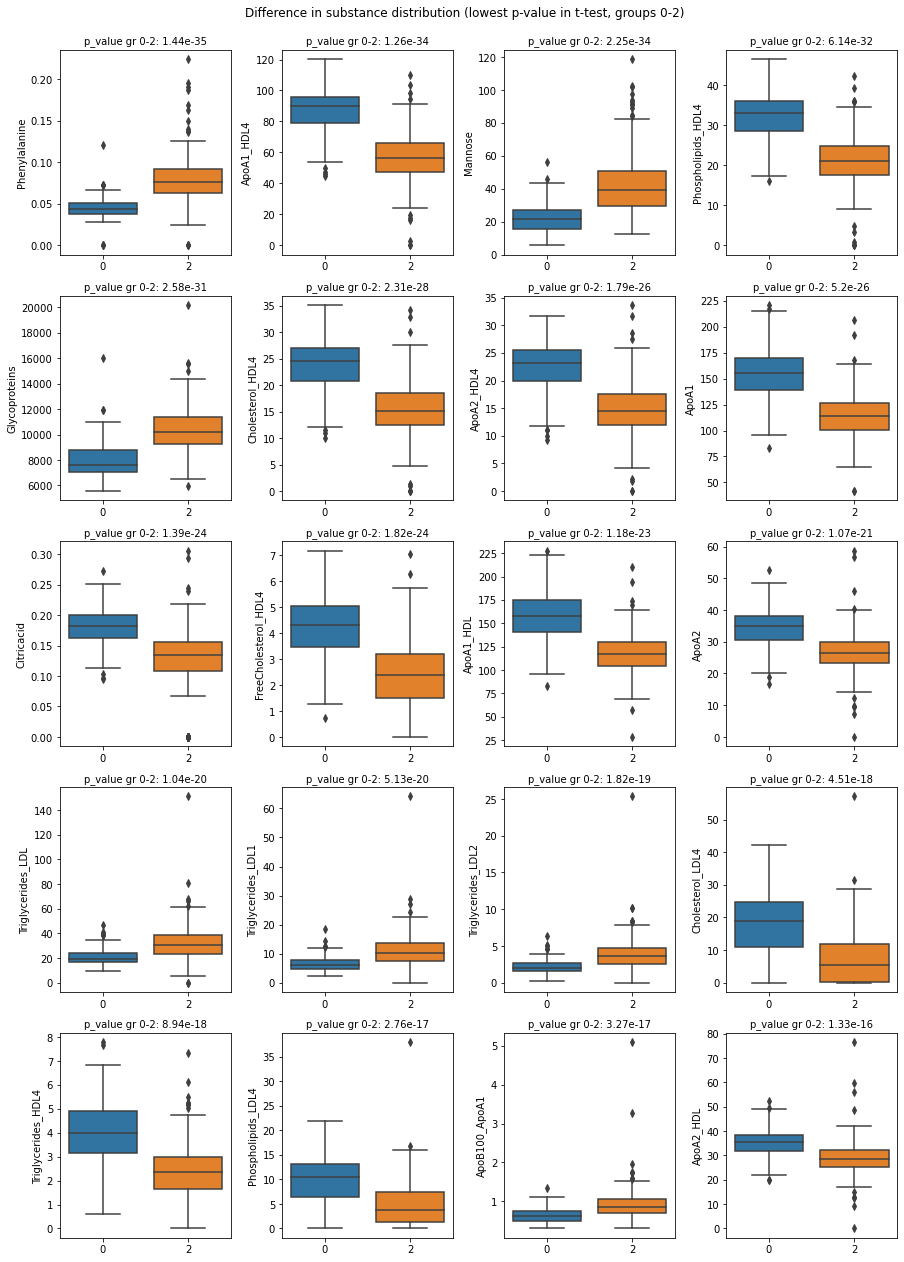

In [8]:
# Create a list of metabolites (substances including small metabolites and lipids) sorted according to the p_value from the independece t-test (in any case case the p>0.05)
list_metabolites_gr02=p_values_df_sorted_gr02["metabolite"]
#%store list_metabolites_gr02

# Take the 20 with the lowest p_value
features_tt_20=list(list_metabolites_gr02[:20])
p_values_tt_20=list(p_values_df_sorted_gr02["p_values"][:20])

fig, axes = plt.subplots(nrows = 5,
                        ncols = 4,
                        figsize = (15,20),
                        gridspec_kw = {"wspace": 0.3,  # Sets the width of padding between subplots (is a fraction of the Axes width)
                                       "hspace": 0.2,
                                        "width_ratios": [ 1, 1, 1, 1] # Sets relative width ratios between subplots 
                                       })

for feat, ax in zip(range(0, len(features_tt_20)), axes.ravel()):
    
    # Plot the box plot
    sns.boxplot(x=data_gr02["group"], y=data_gr02[features_tt_20[feat]], data=data_gr02, ax=ax)
    ax.set_title('p_value gr 0-2: {:.3g}'.format(p_values_tt_20[feat]),fontsize=10)
    ax.set(xlabel=None)
fig.suptitle("Difference in substance distribution (lowest p-value in t-test, groups 0-2)") 
fig.subplots_adjust(top=0.95)
plt.show()

## The groups 0 (post-COVID) and 1 (post acute phase of infection)

**Null hypothesis:** \
H0 = the distribution of values of each metabolite in the two groups of patients 0 and 1 is roughly the same.
If the p_value is less than 0.05, I can reject this null hypothesis and conclude that the distribution of values of each metabolite is different in the two groups. 

In [9]:
p_values=[]
for col in list(data_num_wo.columns)[1:]:
    val0=data_num_wo[data_num_wo['group']==0][col]
    val1=data_num_wo[data_num_wo['group']==1][col]
    t_statistic, p_value = ttest_ind(val0, val1, nan_policy="omit", equal_var=False)
    p_values.append(p_value)
    
# Collect the p_values in a DataFrame
p_values_df_gr01=pd.DataFrame(list(data_num_wo.columns[1:]), columns=["metabolite"]) # ignore the first column ['group'] as not needed anymore
p_values_df_gr01["p_values"]=p_values

# Choose only entries where p<0.05 where we reject the null hypothesis
p_values_df_gr01=p_values_df_gr01[p_values_df_gr01["p_values"]<0.05]
print(p_values_df_gr01.shape)

(45, 2)


**Comment:** It seems that the quantity of 45 out of the 139 metabolites (all the numerical features) differ in patients in the two groups 0 and 1.

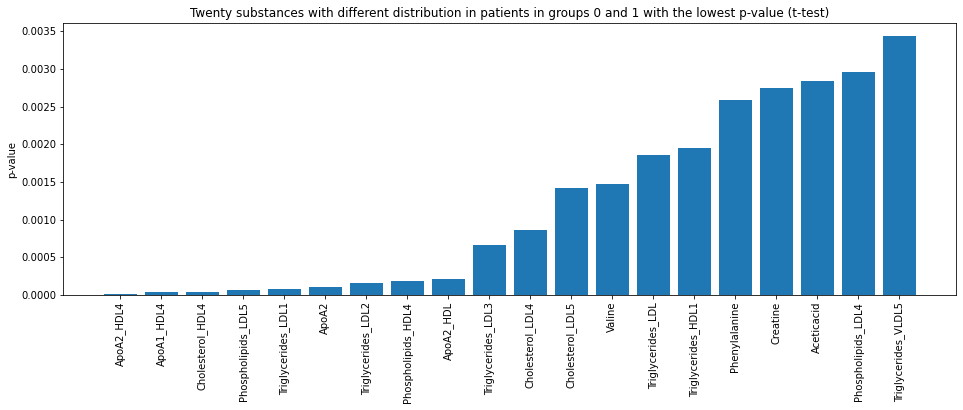

In [10]:
# Store the data with sorted p-values
p_values_df_sorted_gr01=p_values_df_gr01.sort_values(by="p_values")

# Plot the features with the lowest p_value
plt.figure(figsize=(16,5))
plt.bar(p_values_df_sorted_gr01[:20]["metabolite"], p_values_df_sorted_gr01[:20]["p_values"])
plt.ylabel("p-value")
plt.title("Twenty substances with different distribution in patients in groups 0 and 1 with the lowest p-value (t-test)")
plt.xticks(rotation=90)
plt.show()

**Comment:** For example, the distribution of the apoliproteins (ApoA2_HDL4, ApoA1_HDL4, ApoA2, ApoA2_HDL) Cholesterol, Phospholipids and Triglycerides is different in patients from groups 0 (post-COVID) and 1 (post-acute phase). 

Stored 'list_metabolites_gr01' (Series)


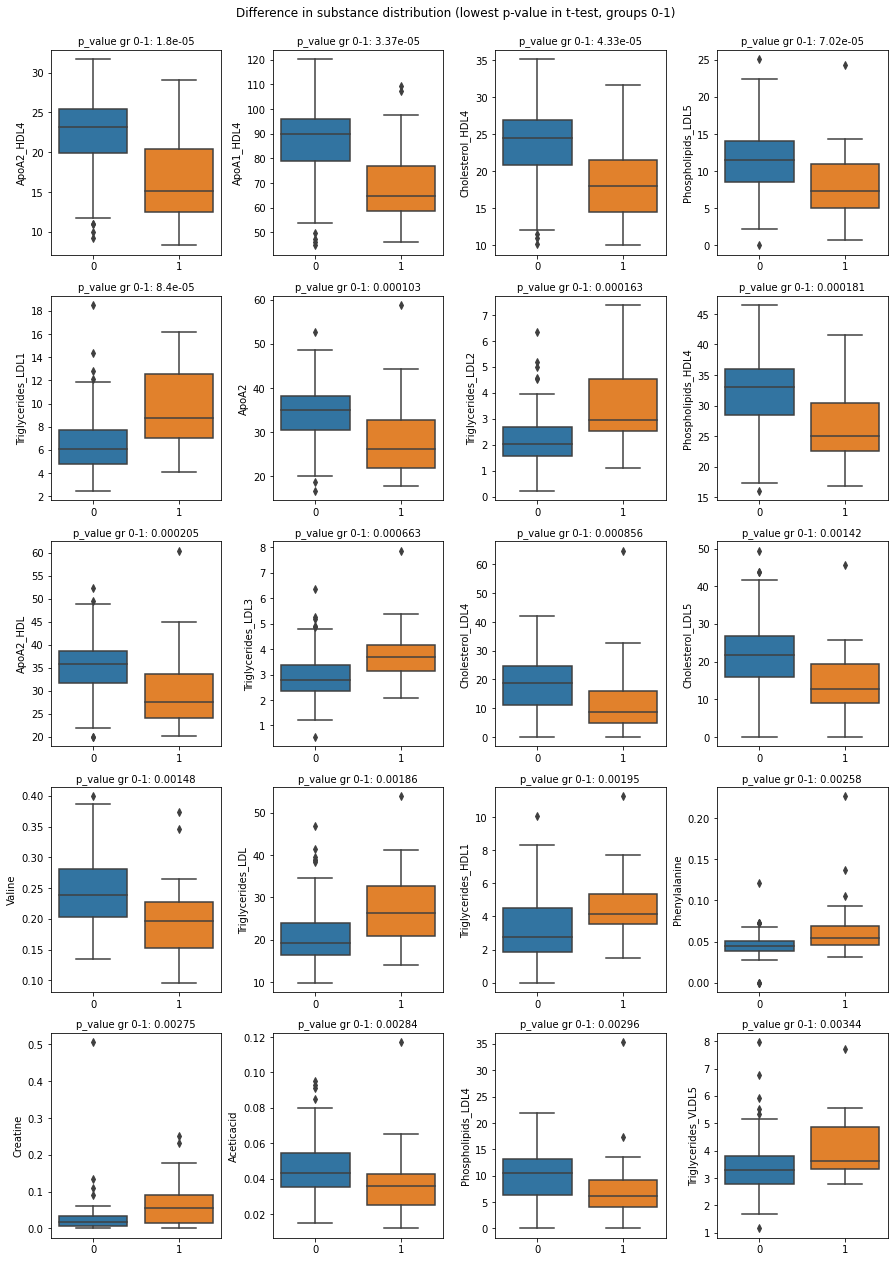

In [11]:
# Create a list of metabolites (substances including small metabolites and lipids) sorted according to the p_value from the independece t-test (in any case case the p>0.05)
list_metabolites_gr01=p_values_df_sorted_gr01["metabolite"]
%store list_metabolites_gr01

# Take the 20 with the lowest p_value
features_tt_20=list(list_metabolites_gr01[:20])
p_values_tt_20=list(p_values_df_sorted_gr01["p_values"][:20])

fig, axes = plt.subplots(nrows = 5,
                        ncols = 4,
                        figsize = (15,20),
                        gridspec_kw = {"wspace": 0.3,  # Sets the width of padding between subplots (is a fraction of the Axes width)
                                       "hspace": 0.2,
                                        "width_ratios": [ 1, 1, 1, 1] # Sets relative width ratios between subplots 
                                       })

for feat, ax in zip(range(0, len(features_tt_20)), axes.ravel()):
    
    # Plot the box plot
    sns.boxplot(x=data_gr01["group"], y=data_gr01[features_tt_20[feat]], data=data_gr01, ax=ax)
    ax.set_title('p_value gr 0-1: {:.3g}'.format(p_values_tt_20[feat]),fontsize=10)
    ax.set(xlabel=None)
fig.suptitle("Difference in substance distribution (lowest p-value in t-test, groups 0-1)") 
fig.subplots_adjust(top=0.95)
plt.show()

- The **intersection** between the two lists of substances that are different in groups 0-2 and 0-1 gives information about the substances that are significantly different between group 0 and 2 and also between group 0 and 1. The quantities of these substances were different in patients in the acute phase and post-COVID and remain different between patients in the post acute phase and in the post-COVID. In other words, despite the process of healing, the substances are still different in patients in groups 0 and 1.

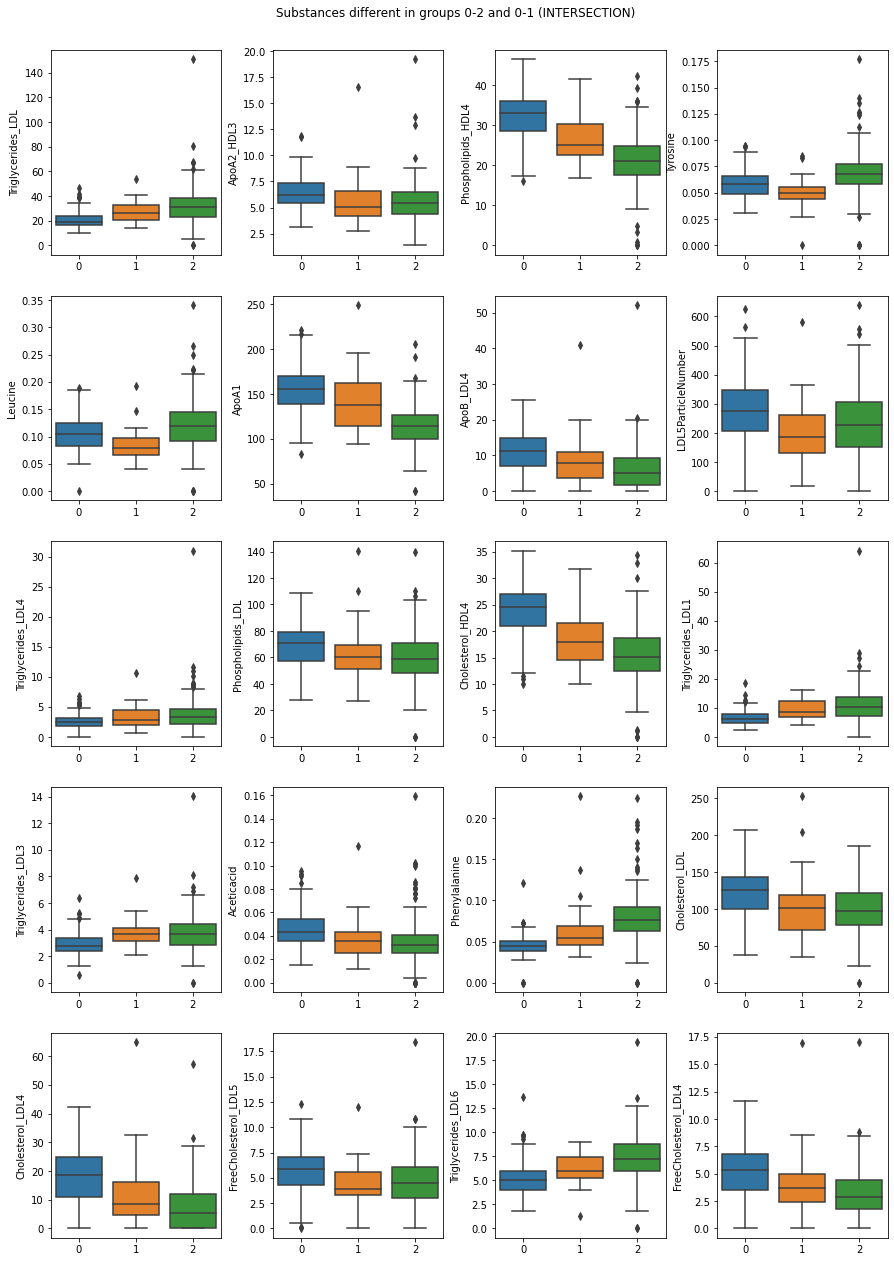

In [12]:
# Intersection
intersection=list(set(p_values_df_sorted_gr02['metabolite']).intersection(p_values_df_sorted_gr01['metabolite']))

# Plot the intersection
fig, axes = plt.subplots(nrows = 5,
                        ncols = 4,
                        figsize = (15,20),
                        gridspec_kw = {"wspace": 0.3,  # Sets the width of padding between subplots (is a fraction of the Axes width)
                                       "hspace": 0.2,
                                        "width_ratios": [ 1, 1, 1, 1] # Sets relative width ratios between subplots 
                                       })

for feat, ax in zip(range(0, len(intersection[:20])), axes.ravel()):
    
    # Plot the box plot
    sns.boxplot(x=data["group"], y=data[intersection[:20][feat]], data=data, ax=ax)
    ax.set(xlabel=None)
fig.suptitle("Substances different in groups 0-2 and 0-1 (INTERSECTION)") 
fig.subplots_adjust(top=0.95)
plt.show()

In [13]:
len(intersection)

40

In [14]:
# From the intersection, display the 20 with the lowest p-value in t-test gr 0-1
set(intersection).intersection(set(list_metabolites_gr01[:20]))

{'Aceticacid',
 'ApoA1_HDL4',
 'ApoA2',
 'ApoA2_HDL',
 'ApoA2_HDL4',
 'Cholesterol_HDL4',
 'Cholesterol_LDL4',
 'Cholesterol_LDL5',
 'Creatine',
 'Phenylalanine',
 'Phospholipids_HDL4',
 'Phospholipids_LDL4',
 'Phospholipids_LDL5',
 'Triglycerides_LDL',
 'Triglycerides_LDL1',
 'Triglycerides_LDL2',
 'Triglycerides_LDL3',
 'Triglycerides_VLDL5',
 'Valine'}

**Comment:** For example, 'Aceticacid', 'Creatine', 'Phenylalanine', 'Valine', 'ApoA1_HDL4', 'ApoA2_HDL4', 'Cholesterol_HDL4' etc. did not revert to normal despite the few weeks of healing. 

- The **difference** between the two lists gives information about substances that were significantly different in patients from groups 0 and 2, but are not anymore different in patients in groups 0 and 1, meaning that these substances reverted to the same level as in recovered patients. These substances could be seen as a marker of healing. 

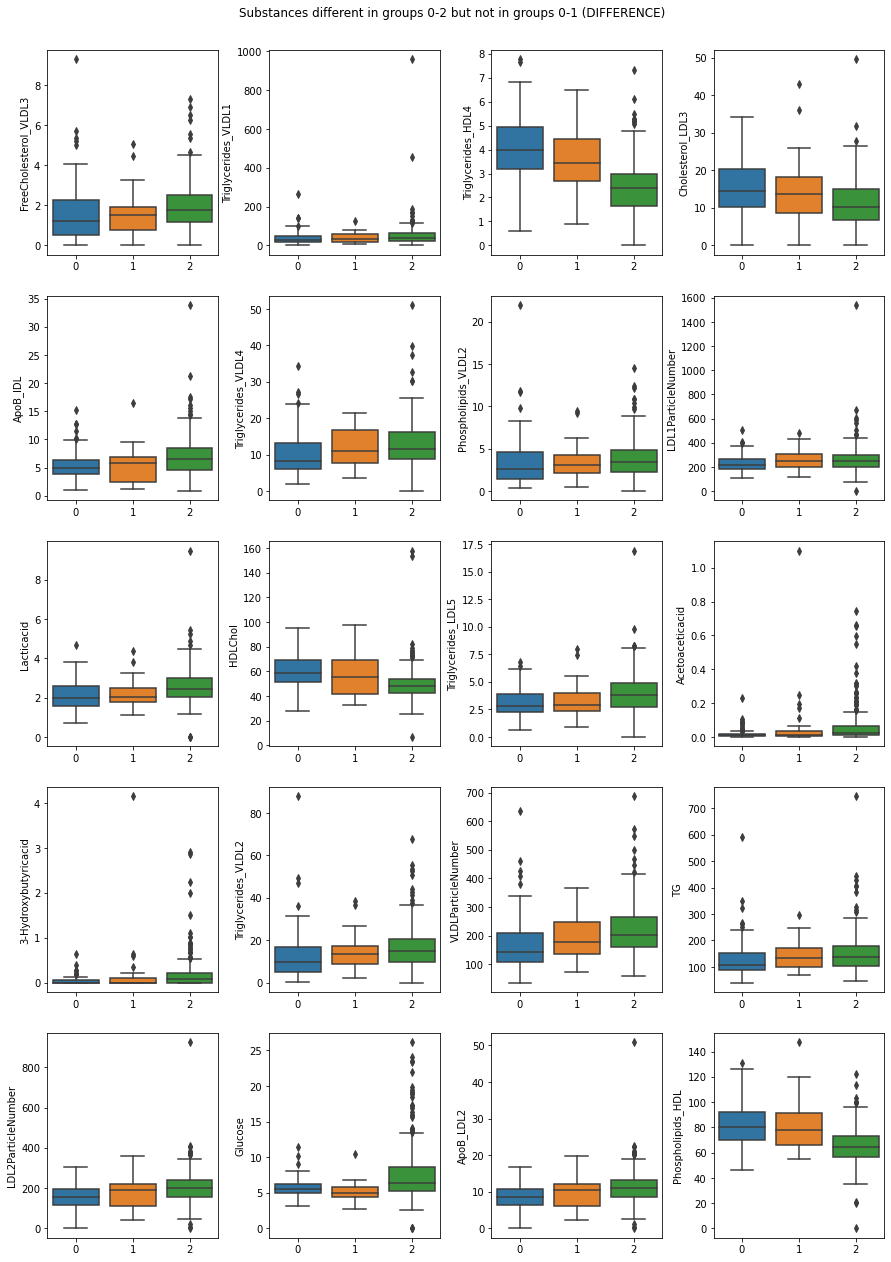

In [15]:
# Difference 
difference=list(set(p_values_df_sorted_gr02['metabolite'])-set(p_values_df_sorted_gr01['metabolite']))

# Intersection
intersection=list(set(p_values_df_sorted_gr02['metabolite']).intersection(p_values_df_sorted_gr01['metabolite']))

# Plot the intersection
fig, axes = plt.subplots(nrows = 5,
                        ncols = 4,
                        figsize = (15,20),
                        gridspec_kw = {"wspace": 0.3,  # Sets the width of padding between subplots (is a fraction of the Axes width)
                                       "hspace": 0.2,
                                        "width_ratios": [ 1, 1, 1, 1] # Sets relative width ratios between subplots 
                                       })

for feat, ax in zip(range(0, len(intersection[:20])), axes.ravel()):
    
    # Plot the box plot
    sns.boxplot(x=data["group"], y=data[difference[:20][feat]], data=data, ax=ax)
    ax.set(xlabel=None)
fig.suptitle("Substances different in groups 0-2 but not in groups 0-1 (DIFFERENCE)") 
fig.subplots_adjust(top=0.95)
plt.show()

## The groups 1 (post acute phase of infection) and 2 (acute phase of infection)

**Null hypothesis:** \
H0 = the distribution of values of each metabolite in the two groups of patients (1 and 2) is roughly the same.
If the p_value is less than 0.05, I can reject this null hypothesis and conclude that the distribution of values of each metabolite is different in the two groups. 

In [16]:
p_values=[]
for col in list(data_num_wo.columns)[1:]:
    val1=data_num_wo[data_num_wo['group']==1][col]
    val2=data_num_wo[data_num_wo['group']==2][col]
    t_statistic, p_value = ttest_ind(val1, val2, nan_policy="omit", equal_var=False)
    p_values.append(p_value)
    
# Collect the p_values in a DataFrame
p_values_df_gr12=pd.DataFrame(list(data_num_wo.columns[1:]), columns=["metabolite"]) # ignore the first column ['group'] as not needed anymore
p_values_df_gr12["p_values"]=p_values

# Choose only entries where p<0.05 where we reject the null hypothesis
p_values_df_gr12=p_values_df_gr12[p_values_df_gr12["p_values"]<0.05]
print(p_values_df_gr12.shape)

(51, 2)


**Comment:** It seems that the quantity of 51 out of the 139 metabolites (all the numerical features) differ in patients in the two groups 1 and 2.

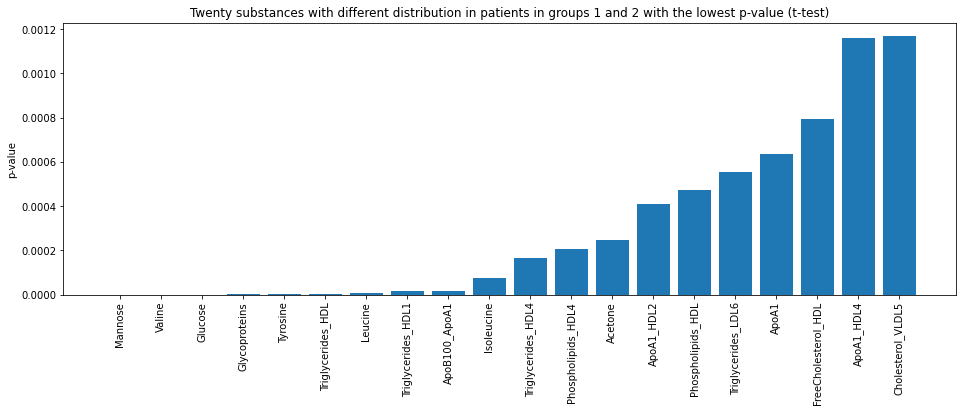

In [17]:
# Store the data with sorted p-values
p_values_df_sorted_gr12=p_values_df_gr12.sort_values(by="p_values")

# Plot the features with the lowest p_value
plt.figure(figsize=(16,5))
plt.bar(p_values_df_sorted_gr12[:20]["metabolite"], p_values_df_sorted_gr12[:20]["p_values"])
plt.ylabel("p-value")
plt.title("Twenty substances with different distribution in patients in groups 1 and 2 with the lowest p-value (t-test)")
plt.xticks(rotation=90)
plt.show()

**Comment:** For example, the distribution of Mannose, Valine, Glucose, Glycoproteins, Tyrosine, Triglycerides HDL, Leucine, Isoleucine etc is different in patients from groups 2 (acute phase) and 1 (post-acute phase). These substances can be seen as a marker of the healing process.

- The intersection between the two lists of substances that are different in groups 0-2 and 1-2 gives information about the substances that are significantly different between group 0 and 2 and also between group 1 and 2. The quantities of these substances are different in patients in the acute phase and post-COVID and different in patients in the acute phase and in the post-acute phase. 
- The difference between the two lists gives information about substances that are significantly different in patients from groups 0 and 2, but are not different 
in patients in groups 1 and 2. 

In [18]:
intersection=list(set(p_values_df_sorted_gr12['metabolite']).intersection(p_values_df_sorted_gr02['metabolite']))
intersection;

In [19]:
difference=list(set(p_values_df_sorted_gr12['metabolite'])-set(p_values_df_sorted_gr02['metabolite']))
difference;